# AA

In [4]:
# Dimensiones
print("Filas × Columnas:", df.shape)

# Tipos y nulos
df.info()
print("\nNulos por columna:\n", df.isnull().sum())


Filas × Columnas: (200, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB

Nulos por columna:
 CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
%matplotlib inline

# Carga
df = pd.read_csv("Mall_Customers.csv")

# Mostrar las 5 primeras filas
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [8]:
print("Registros duplicados:", df.duplicated().sum())


Registros duplicados: 0


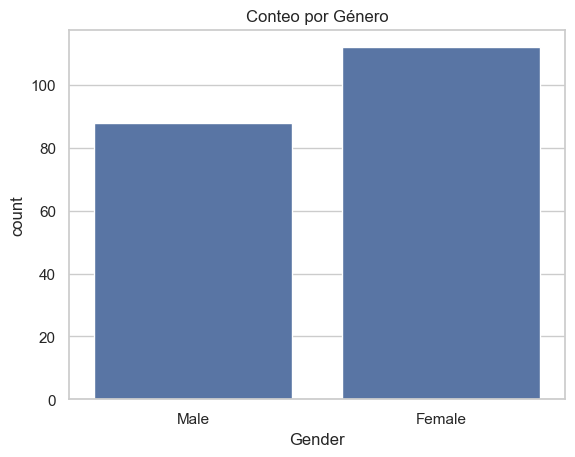

In [10]:
sns.countplot(data=df, x="Gender")
plt.title("Conteo por Género")
plt.show()


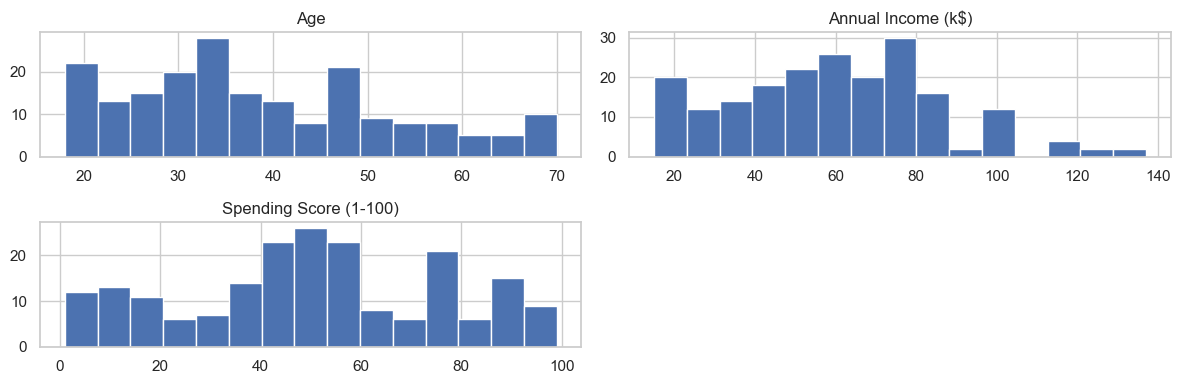

In [12]:
df.hist(column=["Age","Annual Income (k$)","Spending Score (1-100)"],
        figsize=(12,4), bins=15)
plt.tight_layout()
plt.show()


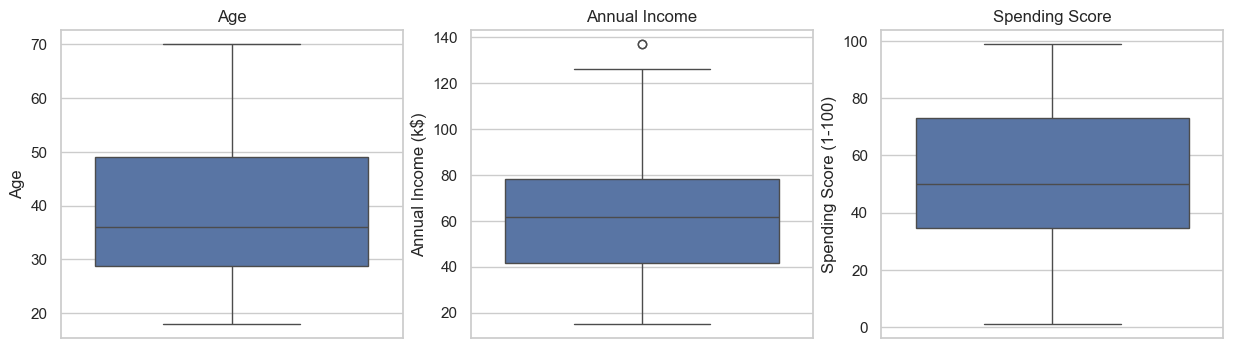

In [14]:
fig, ax = plt.subplots(1,3, figsize=(15,4))
sns.boxplot(y=df["Age"], ax=ax[0]).set_title("Age")
sns.boxplot(y=df["Annual Income (k$)"], ax=ax[1]).set_title("Annual Income")
sns.boxplot(y=df["Spending Score (1-100)"], ax=ax[2]).set_title("Spending Score")
plt.show()


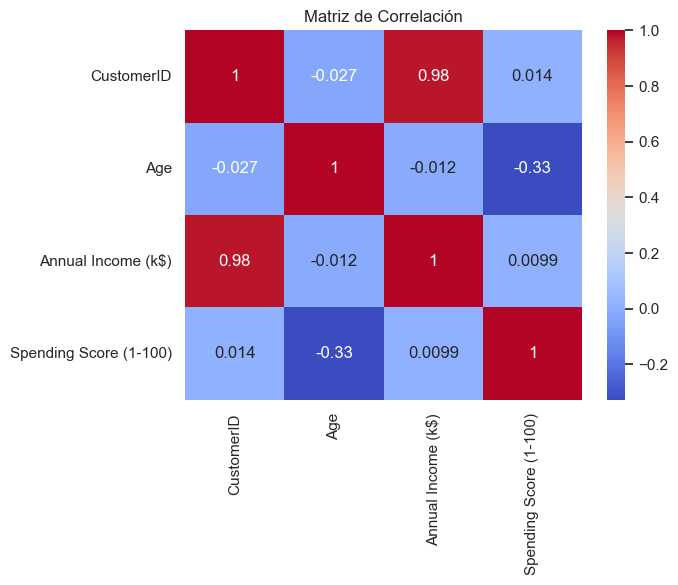

In [16]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Matriz de Correlación")
plt.show()


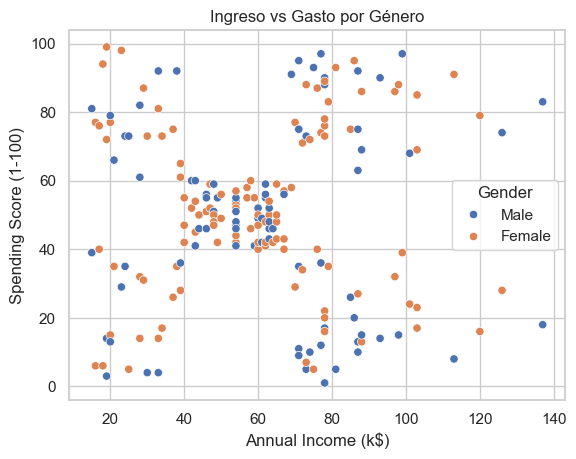

In [18]:
sns.scatterplot(data=df,
                x="Annual Income (k$)",
                y="Spending Score (1-100)",
                hue="Gender")
plt.title("Ingreso vs Gasto por Género")
plt.show()


In [20]:
df.isnull().sum()


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [22]:
df.duplicated().sum()     # Ver cuántos duplicados hay
df = df.drop_duplicates() # Eliminarlos si existen


In [24]:
df.dtypes  # Verifica si por ejemplo "Age" o "Annual Income" están como numéricos


CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [26]:
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})


In [28]:
import seaborn as sns
sns.boxplot(data=df[['Annual Income (k$)', 'Spending Score (1-100)']])


<Axes: >

In [30]:
Q1 = df['Annual Income (k$)'].quantile(0.25)
Q3 = df['Annual Income (k$)'].quantile(0.75)
IQR = Q3 - Q1
filtro = (df['Annual Income (k$)'] >= Q1 - 1.5 * IQR) & (df['Annual Income (k$)'] <= Q3 + 1.5 * IQR)
df = df[filtro]


In [32]:
from sklearn.feature_selection import SelectKBest, f_classif

X = df.drop(columns=['Spending Score (1-100)'])  # Variables independientes
y = df['Spending Score (1-100)']                 # Variable objetivo

selector = SelectKBest(score_func=f_classif, k='all')
fit = selector.fit(X, y)

# Mostrar puntajes
import pandas as pd
scores = pd.DataFrame({'Feature': X.columns, 'Score': fit.scores_})
print(scores.sort_values(by='Score', ascending=False))


              Feature     Score
0          CustomerID  1.648494
3  Annual Income (k$)  1.624676
1              Gender  1.108313
2                 Age  1.069599


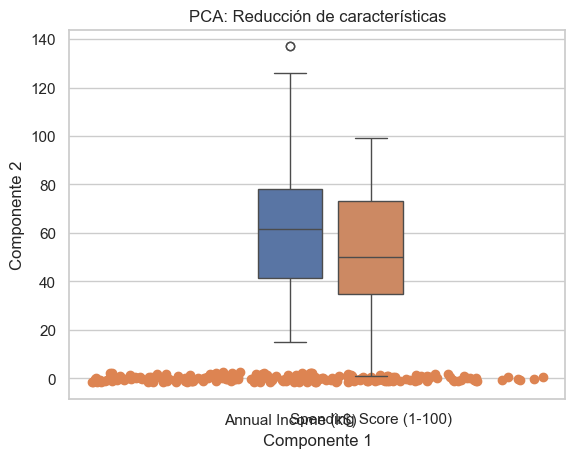

In [34]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualizar
plt.scatter(X_pca[:,0], X_pca[:,1])
plt.title("PCA: Reducción de características")
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.show()


In [36]:
from sklearn.preprocessing import StandardScaler

X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

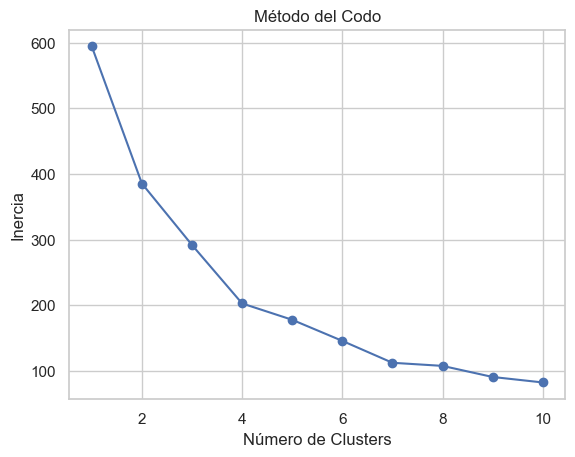

In [38]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.title('Método del Codo')
plt.show()


In [40]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score

# 3. Entrenar K-Means con k=4
k_opt = 4
kmeans = KMeans(n_clusters=k_opt, init='k-means++', max_iter=300, random_state=42)
labels = kmeans.fit_predict(X_scaled)

# 4. Asignar el grupo al DataFrame
df['Cluster_k4'] = labels

# 5. Evaluar desempeño
sil_score = silhouette_score(X_scaled, labels)
ch_score  = calinski_harabasz_score(X_scaled, labels)
print(f"Silhouette Score (k=4): {sil_score:.3f}")
print(f"Calinski-Harabasz (k=4): {ch_score:.3f}")


Silhouette Score (k=4): 0.406
Calinski-Harabasz (k=4): 124.838


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


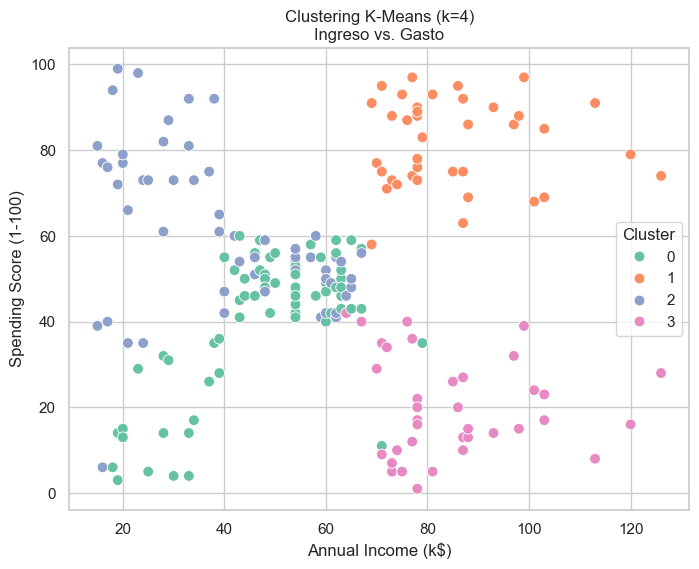

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.scatterplot(
    x = df['Annual Income (k$)'],
    y = df['Spending Score (1-100)'],
    hue = df['Cluster_k4'],
    palette = 'Set2',
    s = 60
)
plt.title('Clustering K-Means (k=4)\nIngreso vs. Gasto')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()


In [44]:
# Convertir centros de X_scaled a escala original
centers_scaled = kmeans.cluster_centers_
centers = scaler.inverse_transform(centers_scaled)
centers_df = pd.DataFrame(centers, columns=['Age','Annual Income (k$)','Spending Score'])
print(centers_df)


         Age  Annual Income (k$)  Spending Score
0  53.984615           47.707692       39.969231
1  32.948718           84.794872       81.487179
2  25.438596           40.000000       60.298246
3  39.567568           85.135135       19.621622


In [46]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score

# Asumiendo que ya tienes X_scaled y labels (Cluster_k4)
sil_score = silhouette_score(X_scaled, df['Cluster_k4'])
ch_score  = calinski_harabasz_score(X_scaled, df['Cluster_k4'])

print(f"Silhouette Score  : {sil_score:.3f}")
print(f"Calinski–Harabasz : {ch_score:.3f}")


Silhouette Score  : 0.406
Calinski–Harabasz : 124.838


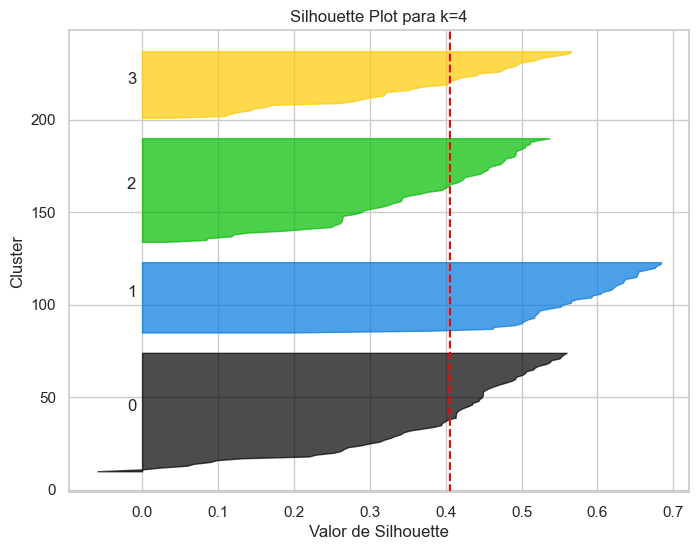

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm

# 1) Obtener valores de Silhouette para cada muestra
sample_vals = silhouette_samples(X_scaled, df['Cluster_k4'])

# 2) Preparar el gráfico
y_lower = 10
n_clusters = len(np.unique(df['Cluster_k4']))
fig, ax1 = plt.subplots(1, 1, figsize=(8, 6))

for i in range(n_clusters):
    ith_vals = sample_vals[df['Cluster_k4'] == i]
    ith_vals.sort()
    size_cluster = ith_vals.shape[0]
    y_upper = y_lower + size_cluster

    color = cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_vals,
                      facecolor=color, edgecolor=color, alpha=0.7)
    ax1.text(-0.02, y_lower + 0.5 * size_cluster, str(i))
    y_lower = y_upper + 10  # espacio entre clusters

ax1.set_title("Silhouette Plot para k=4")
ax1.set_xlabel("Valor de Silhouette")
ax1.set_ylabel("Cluster")
ax1.axvline(x=sil_score, color="red", linestyle="--")
plt.show()


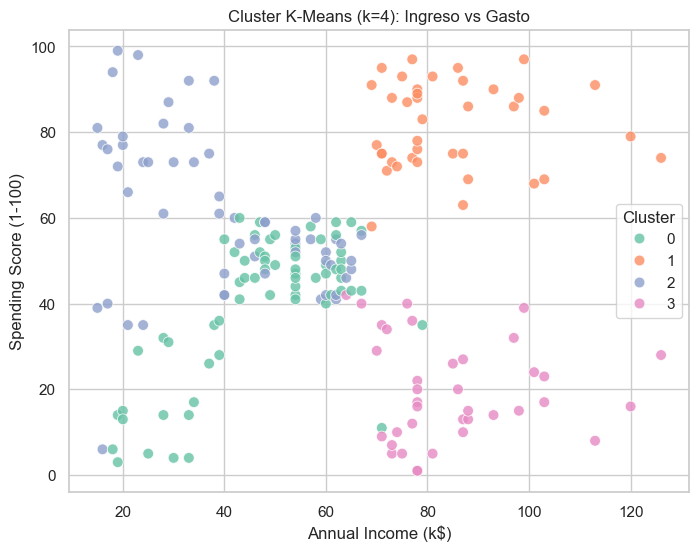

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Cluster_k4',
    palette='Set2',
    s=60,
    alpha=0.8
)
plt.title('Cluster K-Means (k=4): Ingreso vs Gasto')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()


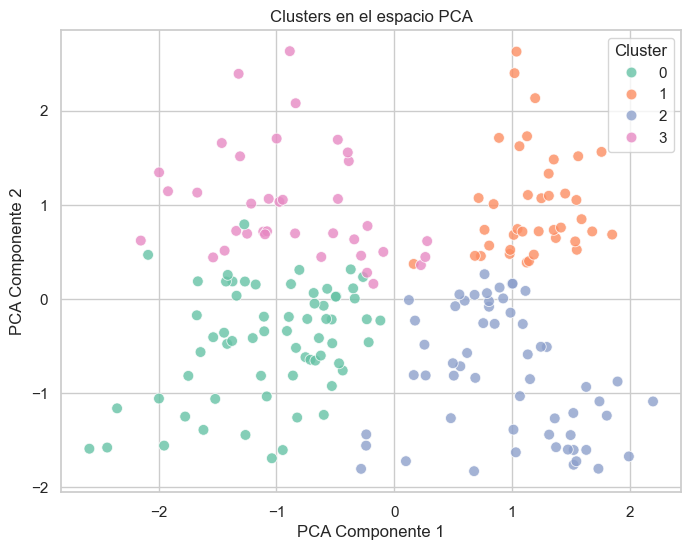

In [52]:
from sklearn.decomposition import PCA

# Asumiendo que X_scaled ya está definido
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(
    x=X_pca[:,0], y=X_pca[:,1],
    hue=df['Cluster_k4'],
    palette='Set2',
    s=60,
    alpha=0.8
)
plt.title('Clusters en el espacio PCA')
plt.xlabel('PCA Componente 1')
plt.ylabel('PCA Componente 2')
plt.legend(title='Cluster')
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_5272\1085700128.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster_k4', y='Age',                data=df, ax=axes[0], palette='Set3')
C:\Users\Admin\AppData\Local\Temp\ipykernel_5272\1085700128.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster_k4', y='Annual Income (k$)', data=df, ax=axes[1], palette='Set3')
C:\Users\Admin\AppData\Local\Temp\ipykernel_5272\1085700128.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster_k4', y='Spending Score (1-100)', data=df, ax=a

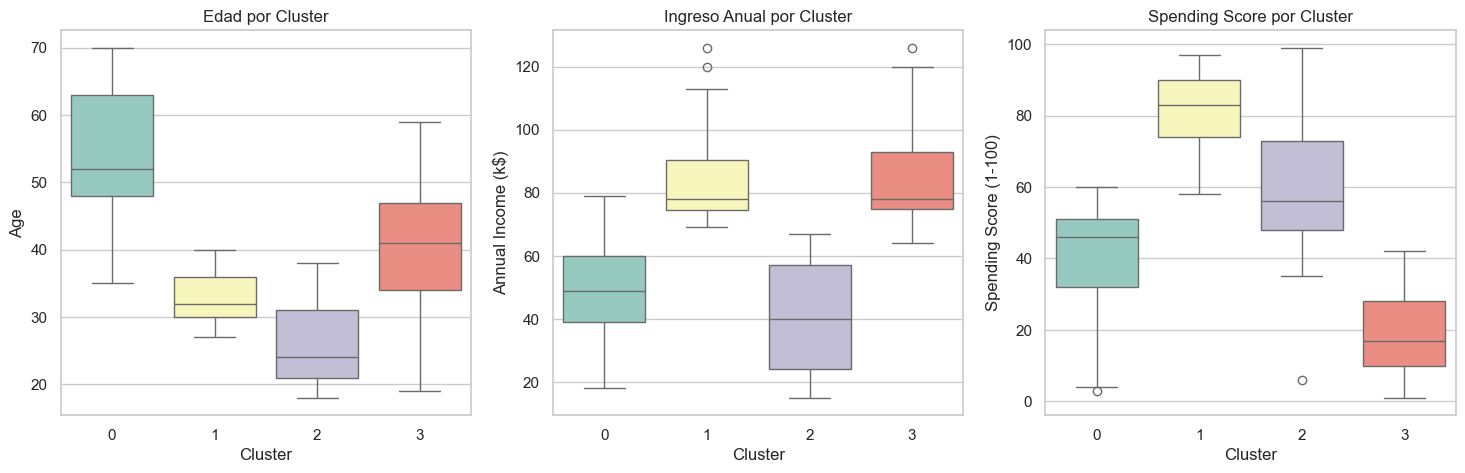

In [54]:
fig, axes = plt.subplots(1,3, figsize=(18,5))

sns.boxplot(x='Cluster_k4', y='Age',                data=df, ax=axes[0], palette='Set3')
sns.boxplot(x='Cluster_k4', y='Annual Income (k$)', data=df, ax=axes[1], palette='Set3')
sns.boxplot(x='Cluster_k4', y='Spending Score (1-100)', data=df, ax=axes[2], palette='Set3')

axes[0].set_title('Edad por Cluster')
axes[1].set_title('Ingreso Anual por Cluster')
axes[2].set_title('Spending Score por Cluster')

for ax in axes:
    ax.set_xlabel('Cluster')
plt.show()


In [56]:
cluster_means = df.groupby('Cluster_k4')[['Age','Annual Income (k$)','Spending Score (1-100)']].mean().reset_index()
cluster_means


,Cluster_k4,Age,Annual Income (k$),Spending Score (1-100)
0,0,53.984615,47.707692,39.969231
1,1,32.948718,84.794872,81.487179
2,2,25.438596,40.000000,60.298246
3,3,39.567568,85.135135,19.621622


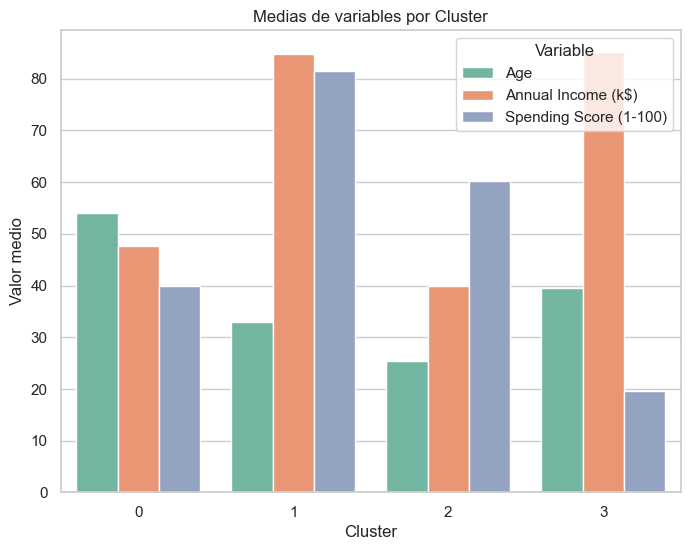

In [58]:
cluster_means_melt = cluster_means.melt(id_vars='Cluster_k4', var_name='Variable', value_name='Media')
plt.figure(figsize=(8,6))
sns.barplot(x='Cluster_k4', y='Media', hue='Variable', data=cluster_means_melt, palette='Set2')
plt.title('Medias de variables por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Valor medio')
plt.legend(title='Variable')
plt.show()


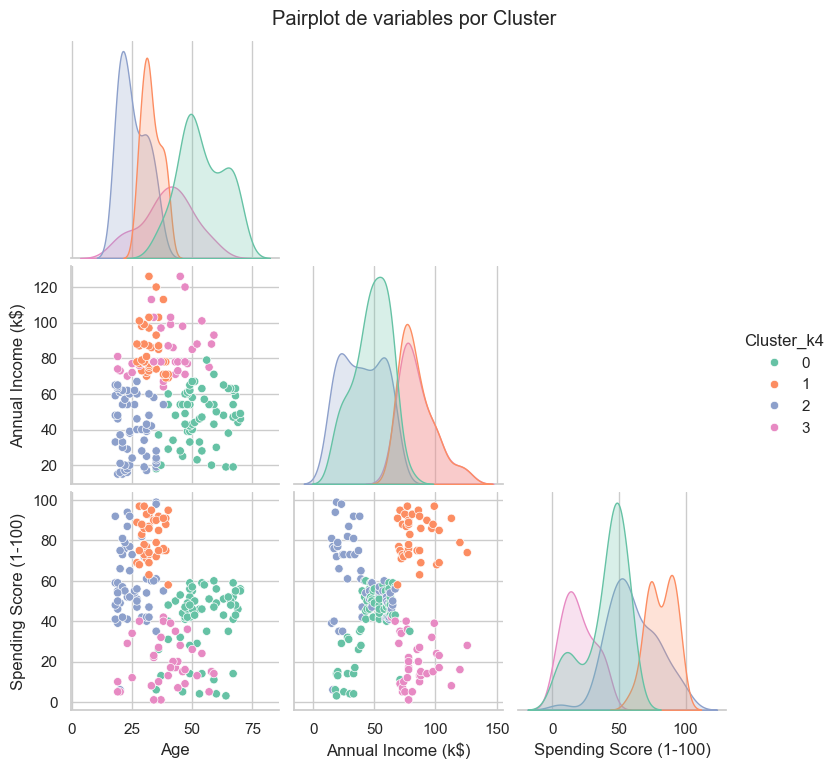

In [60]:
sns.pairplot(
    df[['Age','Annual Income (k$)','Spending Score (1-100)','Cluster_k4']],
    hue='Cluster_k4',
    palette='Set2',
    diag_kind='kde',
    corner=True
)
plt.suptitle('Pairplot de variables por Cluster', y=1.02)
plt.show()
